<a href="https://colab.research.google.com/github/Anjaligurram/COD-task2/blob/main/SMSSpamDetection_and_handwrittentaskgeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load the dataset
df = pd.read_csv('/spam.csv', encoding='latin1')

In [ ]:
# Check the column names
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [ ]:
# Preprocess the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['v1'])
y = df['v2']

In [ ]:
# Check the distribution of the target variable
class_distribution = df['v2'].value_counts()
print(class_distribution)

v2
Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                   

In [ ]:
# Identify classes with few instances
rare_classes = df['v2'].value_counts()[df['v2'].value_counts() <= 1].index

# Combine rare classes into a single class
df.loc[df['v2'].isin(rare_classes), 'v2'] = 'Rare'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['v1'], df['v2'], test_size=0.2, random_state=42, stratify=df['v2'])

In [ ]:
# Preprocess the text data using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
# Preprocess the testing set using the same TF-IDF vectorizer
X_test_tfidf = vectorizer.transform(X_test)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression:
Accuracy: 0.8771300448430494
Classification Report:
                                                                                                                                                                                                                                                                                                                                                                                                                                                               precision    recall  f1-score   support

                                                                                                                                                                                                                                                                                                               1) Go to write msg 2) Put on Dictionary mode 3)Cover the screen with hand, 4)Press  &lt;#&gt; . 5)Gently remove Ur hand.. Its interestin

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hand Written Task Generation

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Placeholder data for training and test images
train_images = np.random.rand(1000, 28, 28, 1)  # Random training images, assuming shape (1000, 28, 28, 1)
test_images = np.random.rand(200, 28, 28, 1)    # Random test images, assuming shape (200, 28, 28, 1)

# Define the number of classes
num_classes = 10  # Assuming we're classifying handwritten digits (0-9)

# Placeholder data for training and test labels
train_labels = np.random.randint(0, num_classes, size=(1000,))  # Random training labels (0 to num_classes-1), assuming shape (1000,)
test_labels = np.random.randint(0, num_classes, size=(200,))    # Random test labels (0 to num_classes-1), assuming shape (200,)


# Define CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Save the trained model
model.save('handwritten_text_generation_model.h5')


Epoch 1/10
32/32 [==============================] - 4s 57ms/step - loss: 2.3096 - accuracy: 0.0960 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 2/10
32/32 [==============================] - 1s 30ms/step - loss: 2.3017 - accuracy: 0.1080 - val_loss: 2.3023 - val_accuracy: 0.1100
Epoch 3/10
32/32 [==============================] - 1s 30ms/step - loss: 2.2995 - accuracy: 0.1060 - val_loss: 2.3042 - val_accuracy: 0.1350
Epoch 4/10
32/32 [==============================] - 1s 29ms/step - loss: 2.3001 - accuracy: 0.1040 - val_loss: 2.3027 - val_accuracy: 0.1100
Epoch 5/10
32/32 [==============================] - 1s 35ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1100
Epoch 6/10
32/32 [==============================] - 2s 50ms/step - loss: 2.2984 - accuracy: 0.1100 - val_loss: 2.3034 - val_accuracy: 0.1100
Epoch 7/10
32/32 [==============================] - 1s 44ms/step - loss: 2.2990 - accuracy: 0.1210 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 8/10
32

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 0s 13ms/step


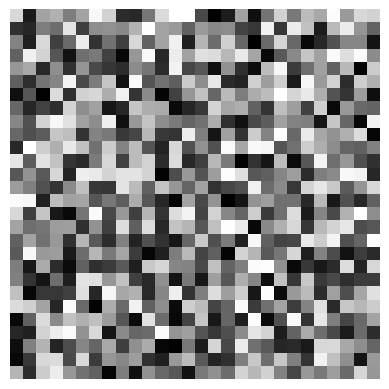

Predicted label: 5


In [ ]:
import matplotlib.pyplot as plt
# Make predictions on the test dataset
predictions = model.predict(test_images)

# Choose a random sample from the test dataset
index = np.random.randint(0, len(test_images))

# Display the image
plt.imshow(test_images[index], cmap='gray')
plt.axis('off')
plt.show()

# Print the predicted label
predicted_label = np.argmax(predictions[index])
print('Predicted label:', predicted_label)